# Below is a summation of the comments posted on the Town Hall forum with Seattle Police Chief Kathleen O’Toole held on Feburary 17th. 

I did this to gain a better understanding of what other Seattle neighborhoods are going through. Before I did this, I did not know if my Nextdoor neighbors and I had a interesting situation or whether it was spread city wide. I will not tell you my interpreation as I think the data should speak for itself. For the record, I am not affliated with NextDoor in anyway.

## Matching Neighborhoods identified in Nextdoor with 'Districts' in Seattle.

I used this page http://clerk.ci.seattle.wa.us/~public/nmaps/neiglist.htm to determine which neighboorhood belong in the correct district.

In [21]:
df_t.sort('District', inplace=True)
with pd.option_context('display.max_rows', 999, 'display.max_columns', 3):
    print (df_t)

                         Neighborhood             District
59                      Woodland Park              Ballard
43                  South Sunset Hill              Ballard
28                  North Sunset Hill              Ballard
45                           Woodland              Ballard
46                       Loyal Sunset              Ballard
32          West Woodland - Southwest              Ballard
61                      Ballard North              Ballard
62                      Ballard South              Ballard
37          West Woodland - Northwest              Ballard
108                           Ballard              Ballard
109                     West Woodland              Ballard
112                       Sunset Hill              Ballard
111                             Adams              Ballard
110                  Whittier Heights              Ballard
113                     Loyal Heights              Ballard
3                         Beacon Hill          Beacon Hi

# The number of comments per 'District' for this post 

In [25]:
import plotly.plotly as py
from plotly.graph_objs import *

trace0 = Bar(
    x=CommentsPerNeightbordhood.index,
    y=CommentsPerNeightbordhood.values,
    marker = dict(color=['rgba(0,0,255,0.5)', 'rgba(192,192,192,1)']*int(len(CommentsPerNeightbordhood.values)/2))
    
)

layout = Layout(
    title='Comments Per District',
    yaxis=dict(
        title='Comments',
        titlefont=dict(
            size=13
        )
    )
)
data = Data([trace0])

fig = Figure(data=data, layout=layout)
py.iplot(fig)#, filename='styling-names')

# Summarization of Comments from each district*

### Here I made a 'wordcloud' of the top 25 words mentioned from posts in each district.  

### Below each wordcloud is data table that lists up to 10 common 'two word' phrases mentioned in the comments. This is done for each of the districts. In order for the 'two word' phrase to be included, the phrase had to be mentioned at least 4 times.  The  data table has two columns, one called  'Phrase' which is the phrase that is mention and the other is called ' #Mentioned' which is indicative of the number of times the Phrase was mentioned in the comments per district. Districts that have no tables did not have a two word phrase that met the above critieria.

_*To anonymize comments, I only examined districts where there were 5 or more comments posted._

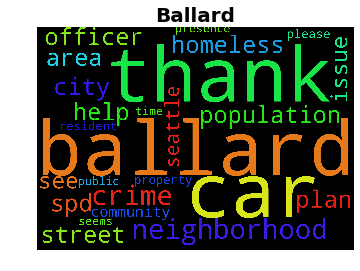

          Phrase  #Mentioned
       break ins           5
      home break           4
 population must           4
     car camping           4
 property crimes           4
   please please           2
    police force           6
 police presence           8
      would like           5


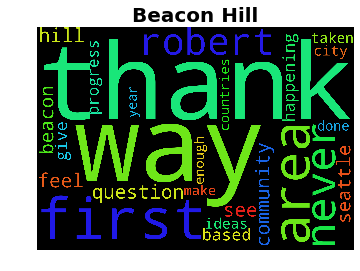

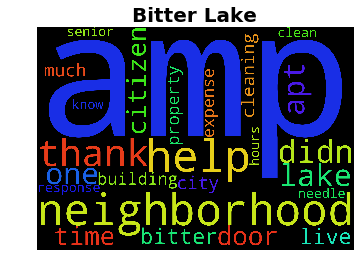

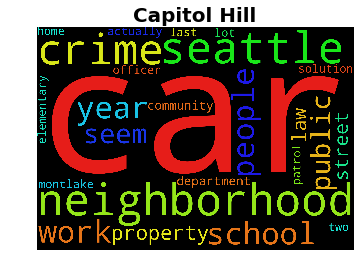

            Phrase  #Mentioned
 elementary school           5
          bait car           4
 police department           4


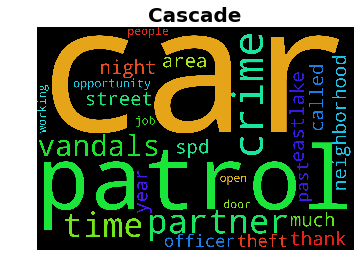

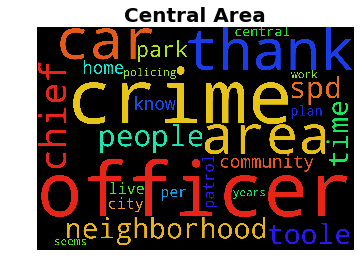

           Phrase  #Mentioned
        break ins           4
       queen anne           4
 central district           5
       would like           4
     officers per           5
   police officer          14
      thank chief           4
  police officers          10


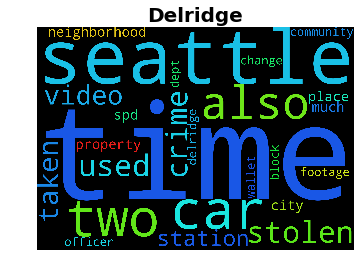

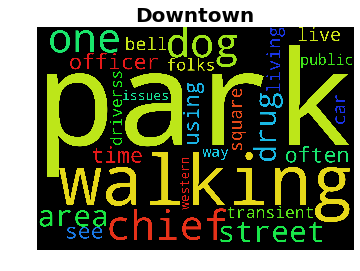

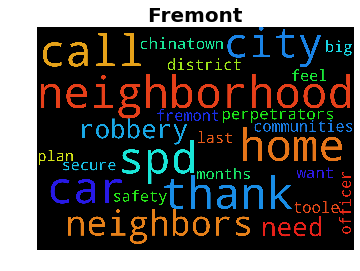

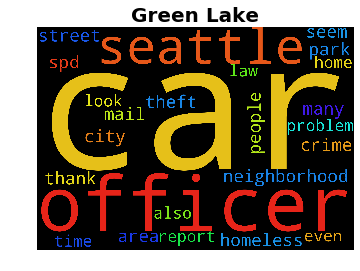

          Phrase  #Mentioned
      green lake           4
      car prowls           4
 police officers           4


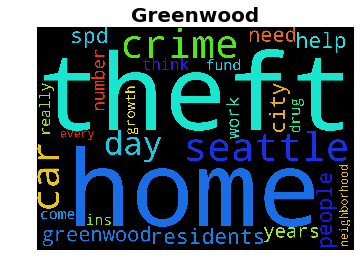

      Phrase  #Mentioned
 number home           4


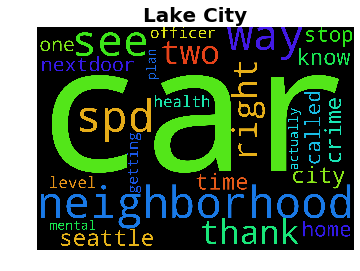

        Phrase  #Mentioned
 mental health           4
     right way           6
    would like           4


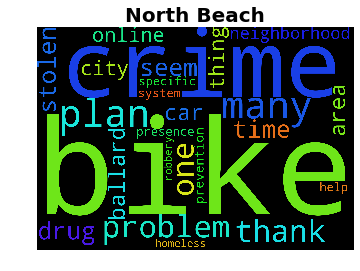

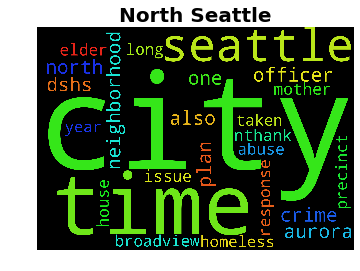

         Phrase  #Mentioned
    elder abuse           4
 response times           4


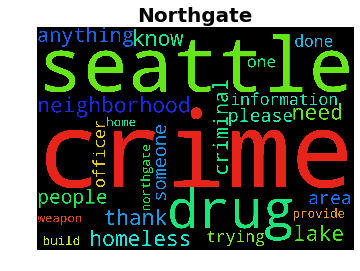

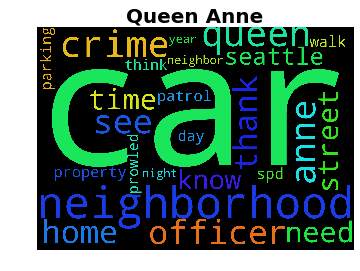

     Phrase  #Mentioned
 queen anne          11
 car prowls           5


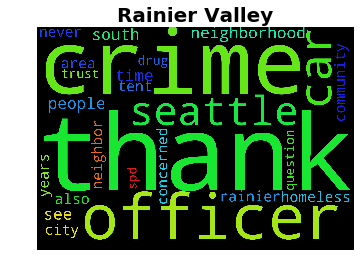

          Phrase  #Mentioned
   south seattle           5
 police officers           4


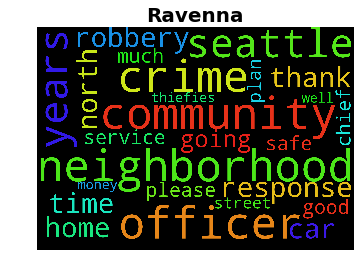

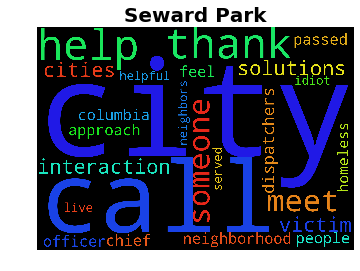

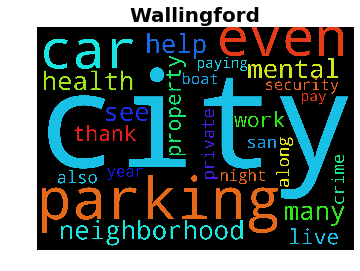

        Phrase  #Mentioned
 mental health           4
    would like           5


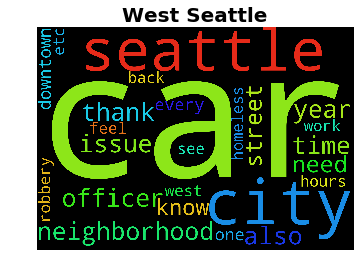

          Phrase  #Mentioned
    west seattle           6
 police officers           4


In [59]:
Districts = CommentsPerNeightbordhood[ CommentsPerNeightbordhood>=5].index
for dis in Districts:
    temp = ' '.join(compiledList.Comment[ compiledList.District==dis])
    Comment_String = review_to_words(temp)
    cleaned_words = word_cleaning(Comment_String)
    call_wordcloud(sorted(cleaned_words), dis)
    temp_df = get_df_of_bigrams(get_bigrams(cleaned_words), Comment_String)
    if not temp_df.empty:
        print (temp_df.to_string(index=False))

# A Summary of All of the Comments Across Seattle

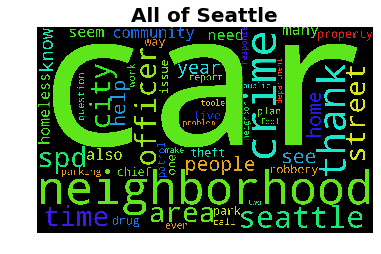

         Phrase  #Mentioned
  mental health          10
     queen anne          17
      break ins          32
   drug dealers           8
    please tell           9
      last year          13
      years ago          11
   drug dealing           8
     car prowls          27
 response times           9


In [71]:
temp_meaningful = []
temp            = ' '.join(compiledList.Comment)
Comment_String  = review_to_words(temp)
cleaned_words   = word_cleaning(Comment_String)
call_wordcloud(sorted(cleaned_words), "All of Seattle")
temp_df         = get_df_of_bigrams(get_bigrams(cleaned_words), Comment_String)
print (temp_df.to_string(index=False))